In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
import pandas as pd

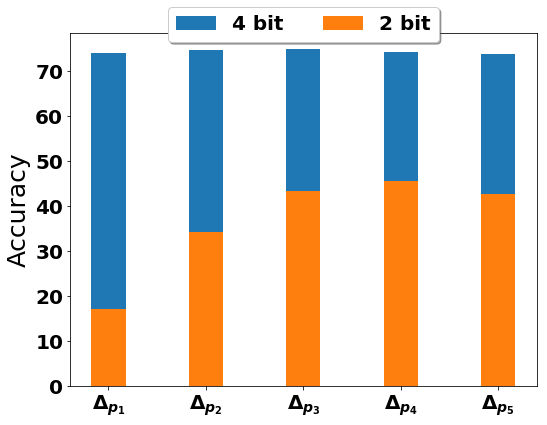

In [5]:
p = [2, 2.5, 3, 3.5, 4]
acc2bit = [17.1, 34.35, 43.3, 45.57, 42.8]
acc4bit = [74., 74.64, 74.87, 74.37, 73.84]

rcParams['figure.figsize'] = 8, 6
font = {'weight' : 'normal', 'size': 20, 'weight': 'bold'}
matplotlib.rc('font', **font)

N = len(p)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, acc4bit, width)
p2 = plt.bar(ind, acc2bit, width)

plt.ylabel('Accuracy', fontsize=25)
plt.xticks(ind, ('$\Delta_{p_1}$', '$\Delta_{p_2}$', '$\Delta_{p_3}$', '$\Delta_{p_4}$', '$\Delta_{p_5}$'))
plt.legend(['4 bit', '2 bit'], loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=2, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('../fig/res50_p_vs_acc.pdf')

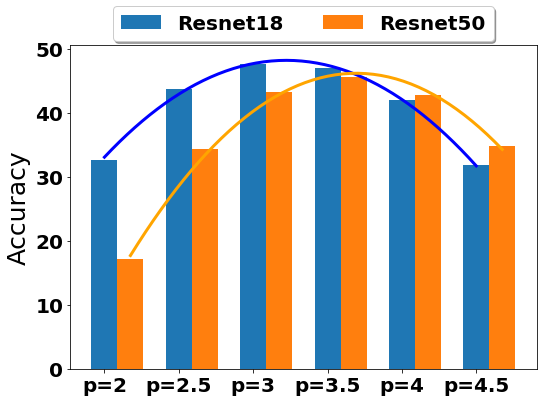

In [156]:
df_2bit = pd.DataFrame()
temp = df_res18[df_res18['p'].isin([2., 2.5, 3., 3.5, 4., 4.5])].reset_index()
df_2bit['p'] = temp.p
df_2bit['res18'] = temp.acc
temp = df_res50[df_res50['p'].isin([2., 2.5, 3., 3.5, 4., 4.5])].reset_index()
df_2bit['res50'] = temp.acc

rcParams['figure.figsize'] = 8, 6
font = {'weight' : 'normal', 'size': 20, 'weight': 'bold'}
matplotlib.rc('font', **font)

N = len(df_2bit)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, df_2bit.res18, width)
p2 = plt.bar(ind+width, df_2bit.res50, width)
plt.ylabel('Accuracy', fontsize=25)
plt.legend(['Resnet18', 'Resnet50'], loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=2, fancybox=True, shadow=True)

plt.xticks(ind, ('p=2', 'p=2.5', 'p=3', 'p=3.5', 'p=4', 'p=4.5'));

min_ = 2
max_ = 4.5

xp = np.linspace(min_, max_, 50)
xp_tag = (xp - min_) * 5 / (max_ - min_)
z = np.polyfit(df_2bit['p'], df_2bit['res18'], 2)
y = np.poly1d(z)
plt.plot(xp_tag, y(xp), '-', c='blue', linewidth=3)


xp = np.linspace(min_, max_, 50)
xp_tag = (xp - min_) * 5 / (max_ - min_) + width
z = np.polyfit(df_2bit['p'], df_2bit['res50'], 2)
y = np.poly1d(z)
plt.plot(xp_tag, y(xp), '-', c='orange', linewidth=3)

plt.tight_layout()
plt.savefig('../fig/res50_res18_pnorms.png')

In [139]:
min_ = 2
max_ = 4.5
(xp - min_) 

array([0.        , 0.06122449, 0.12244898, 0.18367347, 0.24489796,
       0.30612245, 0.36734694, 0.42857143, 0.48979592, 0.55102041,
       0.6122449 , 0.67346939, 0.73469388, 0.79591837, 0.85714286,
       0.91836735, 0.97959184, 1.04081633, 1.10204082, 1.16326531,
       1.2244898 , 1.28571429, 1.34693878, 1.40816327, 1.46938776,
       1.53061224, 1.59183673, 1.65306122, 1.71428571, 1.7755102 ,
       1.83673469, 1.89795918, 1.95918367, 2.02040816, 2.08163265,
       2.14285714, 2.20408163, 2.26530612, 2.32653061, 2.3877551 ,
       2.44897959, 2.51020408, 2.57142857, 2.63265306, 2.69387755,
       2.75510204, 2.81632653, 2.87755102, 2.93877551, 3.        ])

Optimal predicted p = 3.20
Maximum predicted acc = 48.33


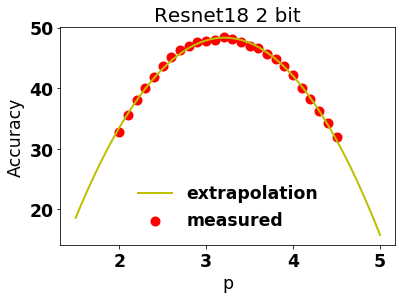

In [47]:
p = np.linspace(2, 4.5, 26)
acc = [32.7, 35.5, 38, 40, 41.8, 43.7, 45.1, 46.25, 46.9, 47.6, 47.74, 48, 48.4, 48.17, 47.57, 47, 46.6, 45.7, 44.74, 43.6, 42.1, 40, 38.2, 36.2, 34.2, 31.9]
df_res18 = pd.DataFrame()
df_res18['p'] = p
df_res18['acc'] = acc

_=plt.scatter(p, acc, linewidth=4, c='r')
plt.ylabel('Accuracy', size='xx-large')
plt.xlabel('p', size='xx-large')
plt.tick_params(axis='both', which='major', labelsize='xx-large')
plt.tick_params(axis='both', which='minor', labelsize='xx-large')
plt.title("Resnet18 2 bit", size=20)

z = np.polyfit(p, acc, 2)
y = np.poly1d(z)

xp = np.linspace(1.5, 5, 100)
plt.plot(xp, y(xp), '-', c='y', linewidth=2)
print("Optimal predicted p = {:.2f}".format(xp[y(xp).argmax()]))
print("Maximum predicted acc = {:.2f}".format(y(xp).max()))

_=plt.legend(['extrapolation', 'measured'], fontsize='xx-large', framealpha=0)

Optimal predicted p = 3.52
Maximum predicted acc = 46.27


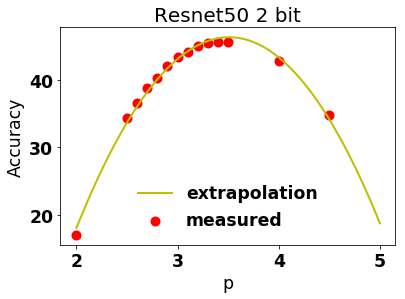

In [48]:
p = np.concatenate([[2], np.linspace(2.5, 3.5, 11), [4, 4.5]])
acc = np.array([17.1] + [34.35, 36.6, 38.8, 40.3, 42, 43.3, 44.1, 45, 45.4, 45.57, 45.57] + [42.8, 34.8])
df_res50 = pd.DataFrame()
df_res50['p'] = p
df_res50['acc'] = acc

_=plt.scatter(p, acc, linewidth=4, c='r')
plt.ylabel('Accuracy', size='xx-large')
plt.xlabel('p', size='xx-large')
plt.tick_params(axis='both', which='major', labelsize='xx-large')
plt.tick_params(axis='both', which='minor', labelsize='xx-large')
plt.title("Resnet50 2 bit", size=20)

z = np.polyfit(p, acc, 2)
y = np.poly1d(z)

xp = np.linspace(2, 5, 100)
plt.plot(xp, y(xp), '-', c='y', linewidth=2)
print("Optimal predicted p = {:.2f}".format(xp[y(xp).argmax()]))
print("Maximum predicted acc = {:.2f}".format(y(xp).max()))

_=plt.legend(['extrapolation', 'measured'], fontsize='xx-large', framealpha=0)

Optimal measured p = 3.00
Maximum measured acc = 74.87


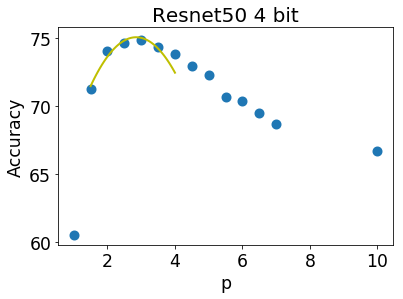

In [10]:
p = np.concatenate([[1, 1.5, 2], np.linspace(2.5, 4, 4), [4.5, 5, 5.5, 6, 6.5, 7, 10]])
acc = np.array([60.54, 71.3, 74.1]+ [74.64, 74.87, 74.37, 73.84] + [73, 72.3, 70.7, 70.4, 69.5, 68.7, 66.7])

_=plt.scatter(p, acc, linewidth=4)
plt.ylabel('Accuracy', size='xx-large')
plt.xlabel('p', size='xx-large')
plt.tick_params(axis='both', which='major', labelsize='xx-large')
plt.tick_params(axis='both', which='minor', labelsize='xx-large')
plt.title("Resnet50 4 bit", size=20)

opt_p = p[acc.argmax()]
opt_p_idx = acc.argmax()

z = np.polyfit(p[opt_p_idx-3:opt_p_idx+2], acc[opt_p_idx-3:opt_p_idx+2], 2)
y = np.poly1d(z)

xp = np.linspace(1.5, 4, 100)
plt.plot(xp, y(xp), '-', c='y', linewidth=2)
print("Optimal measured p = {:.2f}".format(opt_p))
print("Maximum measured acc = {:.2f}".format(acc.max()))

# _=plt.legend(['extrapolation', 'measured'], fontsize='xx-large', framealpha=0)

Optimal predicted p = 3.16
Maximum predicted acc = 71.03


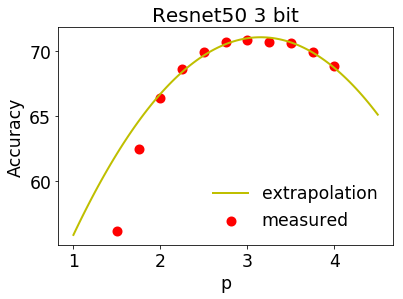

In [5]:
p = np.concatenate([np.linspace(1.5, 4, 11)])
acc = [56.2, 62.5, 66.4, 68.57, 69.9, 70.7, 70.8, 70.67, 70.6, 69.9, 68.8]

_=plt.scatter(p, acc, linewidth=4, c='r')
plt.ylabel('Accuracy', size='xx-large')
plt.xlabel('p', size='xx-large')
plt.tick_params(axis='both', which='major', labelsize='xx-large')
plt.tick_params(axis='both', which='minor', labelsize='xx-large')
plt.title("Resnet50 3 bit", size=20)

z = np.polyfit(p[2:], acc[2:], 2)
y = np.poly1d(z)

xp = np.linspace(1, 4.5, 100)
plt.plot(xp, y(xp), '-', c='y', linewidth=2)
print("Optimal predicted p = {:.2f}".format(xp[y(xp).argmax()]))
print("Maximum predicted acc = {:.2f}".format(y(xp).max()))

_=plt.legend(['extrapolation', 'measured'], fontsize='xx-large', framealpha=0)

In [6]:
np.linspace(1, 4, 13)

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
       3.75, 4.  ])

Optimal predicted p = 1.83
Maximum predicted acc = 63.62


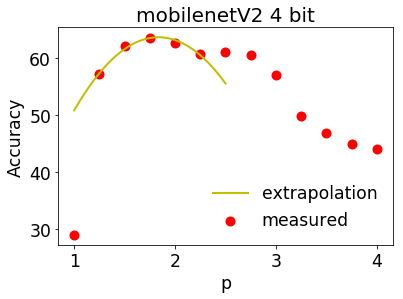

In [7]:
p = np.linspace(1, 4, 13)
acc = np.array([29, 57.1, 62, 63.5, 62.66, 60.7, 61, 60.5, 56.95, 49.77, 46.8, 45, 44])

_=plt.scatter(p, acc, linewidth=4, c='r')
plt.ylabel('Accuracy', size='xx-large')
plt.xlabel('p', size='xx-large')
plt.tick_params(axis='both', which='major', labelsize='xx-large')
plt.tick_params(axis='both', which='minor', labelsize='xx-large')
plt.title("mobilenetV2 4 bit", size=20)

z = np.polyfit(p[1:6], acc[1:6], 2)
y = np.poly1d(z)

xp = np.linspace(1, 2.5, 100)
plt.plot(xp, y(xp), '-', c='y', linewidth=2)
print("Optimal predicted p = {:.2f}".format(xp[y(xp).argmax()]))
print("Maximum predicted acc = {:.2f}".format(y(xp).max()))

_=plt.legend(['extrapolation', 'measured'], fontsize='xx-large', framealpha=0)